# BulkOmicsTools

In [3]:
# Data Science Tools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import scipy.stats as stats
# Bioinfokit
# !pip install bioinfokit
import bioinfokit as bik
from bioinfokit import analys, visuz

## Case #1 - Analyte name-only data

In [2]:
# Control
sample_T_C_1 = pd.read_excel('sample_T_C_1.xlsx' 
                             # ,header=None
                            ).iloc[:, 0].tolist()
sample_T_C_2 = pd.read_excel('sample_T_C_2.xlsx', 
                             # ,header=None
                            ).iloc[:, 0].tolist()
sample_T_C_3  = pd.read_excel('sample_T_C_3.xlsx', 
                              # ,header=None
                             ).iloc[:, 0].tolist()

# In Vitro
sample_T_invitro_1 = pd.read_excel('sample_T_in_vitro_1.xlsx', 
                                  # ,header=None
                                  ).iloc[:, 0].tolist()
sample_T_invitro_2 = pd.read_excel('sample_T_in_vitro_2.xlsx'
                                   # ,header=None
                                  ).iloc[:, 0].tolist()
sample_T_invitro_3 = pd.read_excel('sample_T_in_vitro_3.xlsx'
                                   # ,header=None
                                  ).iloc[:, 0].tolist()

# In Vivo
sample_T_invivo_1 = pd.read_excel('sample_T_in_vivo_1.xlsx'
                                  # ,header=None
                                 ).iloc[:, 0].tolist()
sample_T_invivo_2 = pd.read_excel('sample_T_in_vivo_2.xlsx'
                                 # ,header=None
                                 ).iloc[:, 0].tolist()
sample_T_invivo_3 = pd.read_excel('sample_T_in_vivo_3.xlsx'
                                 # ,header=None
                                 ).iloc[:, 0].tolist()

In [3]:
# Create a dictionary of Sample names and Analyte name-containing lists

data = {
    "Control T-cells 1": sample_T_C_1,
    "Control T-cells 2": sample_T_C_2,
    "Control T-cells 3": sample_T_C_3,

    "In Vitro T-cells 1": sample_T_invitro_1,
    "In Vitro T-cells 2": sample_T_invitro_2,
    "In Vitro T-cells 3": sample_T_invitro_3,

    "In Vivo T-cells 1": sample_T_invivo_1,
    "In Vivo T-cells 2": sample_T_invivo_2,
    "In Vivo T-cells 3": sample_T_invivo_3,
}

In [4]:
# Build a data frame of samples and their Analytes

Analytes = set(Analyte for sample in data.values() for Analyte in sample)

df = pd.DataFrame(
    {Analyte: [1 if Analyte in data[name] else 0 for name in data.keys()] for Analyte in Analytes},
    index=data.keys()
)

df

,Fumarate,L-Arginine,Pyruvate,Linoleate,Isocitrate,3-Phosphoglycerate,S-adenosylmethionine,Nitric oxide,Glutathione,Acetyl-CoA,...,Citrate,Oleate,Succinyl-CoA,Succinate,GTP,L-Isoleucine,Putrescine,Glucose-6-phosphate,UTP,Palmitate
Control T-cells 1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Control T-cells 2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Control T-cells 3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,0
In Vitro T-cells 1,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
In Vitro T-cells 2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
In Vitro T-cells 3,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,1,1,1,0
In Vivo T-cells 1,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,0,1
In Vivo T-cells 2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,1,0,1
In Vivo T-cells 3,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,1,1,0,0


## Case #2 - log-transofmed Analyte data

In [5]:
df = pd.read_excel('NanoString_GEX_Filtered.xlsx')
df.rename(columns={'Gene': 'Sample'}, inplace=True) # Rename sample column name if needed
df.set_index(['Sample'], inplace=True)
df = df.T
df

Sample,App,Arhgdib,B2m,Blnk,Btla,C3,Camp,Casp8,Ccl3,Ccl9,...,Tgfbi,Tgfbr2,Tnfaip3,Tnfrsf11a,Tnfrsf14,Tollip,Traf4,Trem1,Tyrobp,Xbp1
Eb BM ABL 1,9.060,12.120,12.100,6.620,6.270,9.78,15.720,7.450,8.820,10.230,...,9.32,7.020,9.910,4.620,6.900,8.400,8.150,9.960,11.550,9.510
Eb BM ABL 2,10.280,12.390,12.250,8.030,7.440,10.14,15.490,8.840,10.440,9.490,...,8.77,8.440,11.180,6.440,8.250,9.200,9.140,10.510,10.670,10.900
Eb BM ABL 3,9.190,12.190,12.310,6.710,5.390,10.71,15.050,6.970,9.290,9.250,...,8.09,7.970,10.360,4.390,7.560,8.850,7.560,9.940,11.000,10.360
Eb BM HA 1,8.790,12.690,11.720,5.290,5.500,10.74,15.400,6.760,9.280,8.540,...,7.32,6.630,10.680,3.910,7.610,8.760,6.980,9.510,11.250,9.570
Eb BM HA 2,8.780,12.450,11.645,5.175,5.730,10.49,15.385,6.980,9.035,8.855,...,7.28,6.580,10.540,4.640,7.565,8.880,6.445,9.570,11.190,9.520
Eb BM HA 3,8.770,12.210,11.570,5.060,5.960,10.24,15.370,7.200,8.790,9.170,...,7.24,6.530,10.400,5.370,7.520,9.000,5.910,9.630,11.130,9.470
Eb BM hyp02 1,7.980,11.760,12.570,6.330,4.630,9.65,14.440,6.270,9.170,8.990,...,8.10,6.900,10.330,4.900,8.920,9.070,6.790,9.370,11.000,9.920
Eb BM hyp02 2,8.600,12.340,12.000,6.510,4.190,9.78,14.470,6.580,8.890,9.750,...,8.68,7.130,10.050,3.800,8.940,9.150,6.970,9.190,11.790,10.130
Eb BM hyp02 3,8.700,12.160,12.230,5.960,4.370,10.09,14.470,6.500,9.480,10.150,...,9.00,6.420,10.610,4.830,8.870,9.250,7.070,9.820,11.540,9.910
Eb BM N 1,7.090,10.835,11.700,6.815,4.845,8.33,13.005,6.330,8.695,8.325,...,7.37,5.985,9.250,2.955,9.470,8.370,5.850,8.245,10.645,8.585


In [6]:
# Cluster samples and Analytes

cluster_map = sns.clustermap(df)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind

clustered_df = df.iloc[:, clustered_cols] # Analyte clustering 
# clustered_df = df.iloc[clustered_rows, :].iloc[:, clustered_cols] # Analyte and sample clustering
clustered_df

Sample,Camp,S100a8,S100a9,Lck,Tcf7,Btla,H2-Ob,Cd22,Cxcr5,Ifna1,...,Cd2,H2-Eb1,Cd74,H2-Aa,Arhgdib,Tfrc,Lilrb4,Tyrobp,B2m,Cd24a
Eb BM ABL 1,15.720,16.790,17.780,4.620,4.98,6.270,6.670,5.720,6.060,4.620,...,7.960,7.770,10.650,10.71,12.120,10.410,11.510,11.550,12.100,10.930
Eb BM ABL 2,15.490,17.290,18.140,4.440,4.44,7.440,7.770,7.030,7.250,4.440,...,9.690,8.140,11.210,11.09,12.390,11.430,13.300,10.670,12.250,10.980
Eb BM ABL 3,15.050,16.580,17.620,6.710,4.39,5.390,4.390,4.390,5.390,5.390,...,7.560,6.970,10.000,9.48,12.190,10.910,11.260,11.000,12.310,11.680
Eb BM HA 1,15.400,17.420,18.110,1.590,4.40,5.500,6.170,4.760,5.170,2.590,...,7.800,7.960,10.780,9.86,12.690,10.410,10.540,11.250,11.720,12.040
Eb BM HA 2,15.385,17.265,18.000,2.400,4.51,5.730,6.085,4.780,5.335,3.150,...,7.850,7.825,10.595,9.83,12.450,10.640,10.705,11.190,11.645,12.020
Eb BM HA 3,15.370,17.110,17.890,3.210,4.62,5.960,6.000,4.800,5.500,3.710,...,7.900,7.690,10.410,9.80,12.210,10.870,10.870,11.130,11.570,12.000
Eb BM hyp02 1,14.440,16.550,17.600,5.130,4.29,4.630,5.400,3.050,4.050,4.900,...,8.170,8.080,10.450,10.85,11.760,12.180,11.080,11.000,12.570,13.500
Eb BM hyp02 2,14.470,16.810,17.740,0.000,2.60,4.190,4.600,3.380,3.700,4.120,...,7.220,6.790,9.760,9.78,12.340,11.700,11.250,11.790,12.000,13.570
Eb BM hyp02 3,14.470,16.910,18.070,5.070,3.70,4.370,5.280,3.960,4.180,4.370,...,8.060,6.960,9.600,9.77,12.160,12.180,11.520,11.540,12.230,13.540
Eb BM N 1,13.005,15.640,16.625,5.345,2.05,4.845,4.745,4.135,3.645,0.625,...,8.165,7.375,10.000,9.96,10.835,12.215,9.710,10.645,11.700,13.625


# Grouped Analyte Analysis

In [7]:
# Design matrix
group_data = {
    'Sample': list(clustered_df.T.columns),
    'Group': [ 
              'Eb BM ABL','Eb BM ABL','Eb BM ABL',
              'Eb BM HA','Eb BM HA','Eb BM HA',
              'Eb BM hyp02','Eb BM hyp02','Eb BM hyp02',
              'Eb BM N','Eb BM N','Eb BM N',
              'Eb FL N','Eb FL N','Eb FL N',
              'Eb Spl N','Eb Spl N','Eb Spl N'
              ]
}
group_df = pd.DataFrame(group_data)
unique_groups = group_df['Group'].unique()

# Map samples to their groups
column_to_group = dict(zip(group_df['Sample'], group_df['Group']))
column_to_group

{'Eb BM ABL 1': 'Eb BM ABL',
 'Eb BM ABL 2': 'Eb BM ABL',
 'Eb BM ABL 3': 'Eb BM ABL',
 'Eb BM HA 1': 'Eb BM HA',
 'Eb BM HA 2': 'Eb BM HA',
 'Eb BM HA 3': 'Eb BM HA',
 'Eb BM hyp02 1': 'Eb BM hyp02',
 'Eb BM hyp02 2': 'Eb BM hyp02',
 'Eb BM hyp02 3': 'Eb BM hyp02',
 'Eb BM N 1': 'Eb BM N',
 'Eb BM N 2': 'Eb BM N',
 'Eb BM N 3': 'Eb BM N',
 'Eb FL N 1': 'Eb FL N',
 'Eb FL N 2': 'Eb FL N',
 'Eb FL N 3': 'Eb FL N',
 'Eb Spl N 1': 'Eb Spl N',
 'Eb Spl N 2': 'Eb Spl N',
 'Eb Spl N 3': 'Eb Spl N'}

### PCA

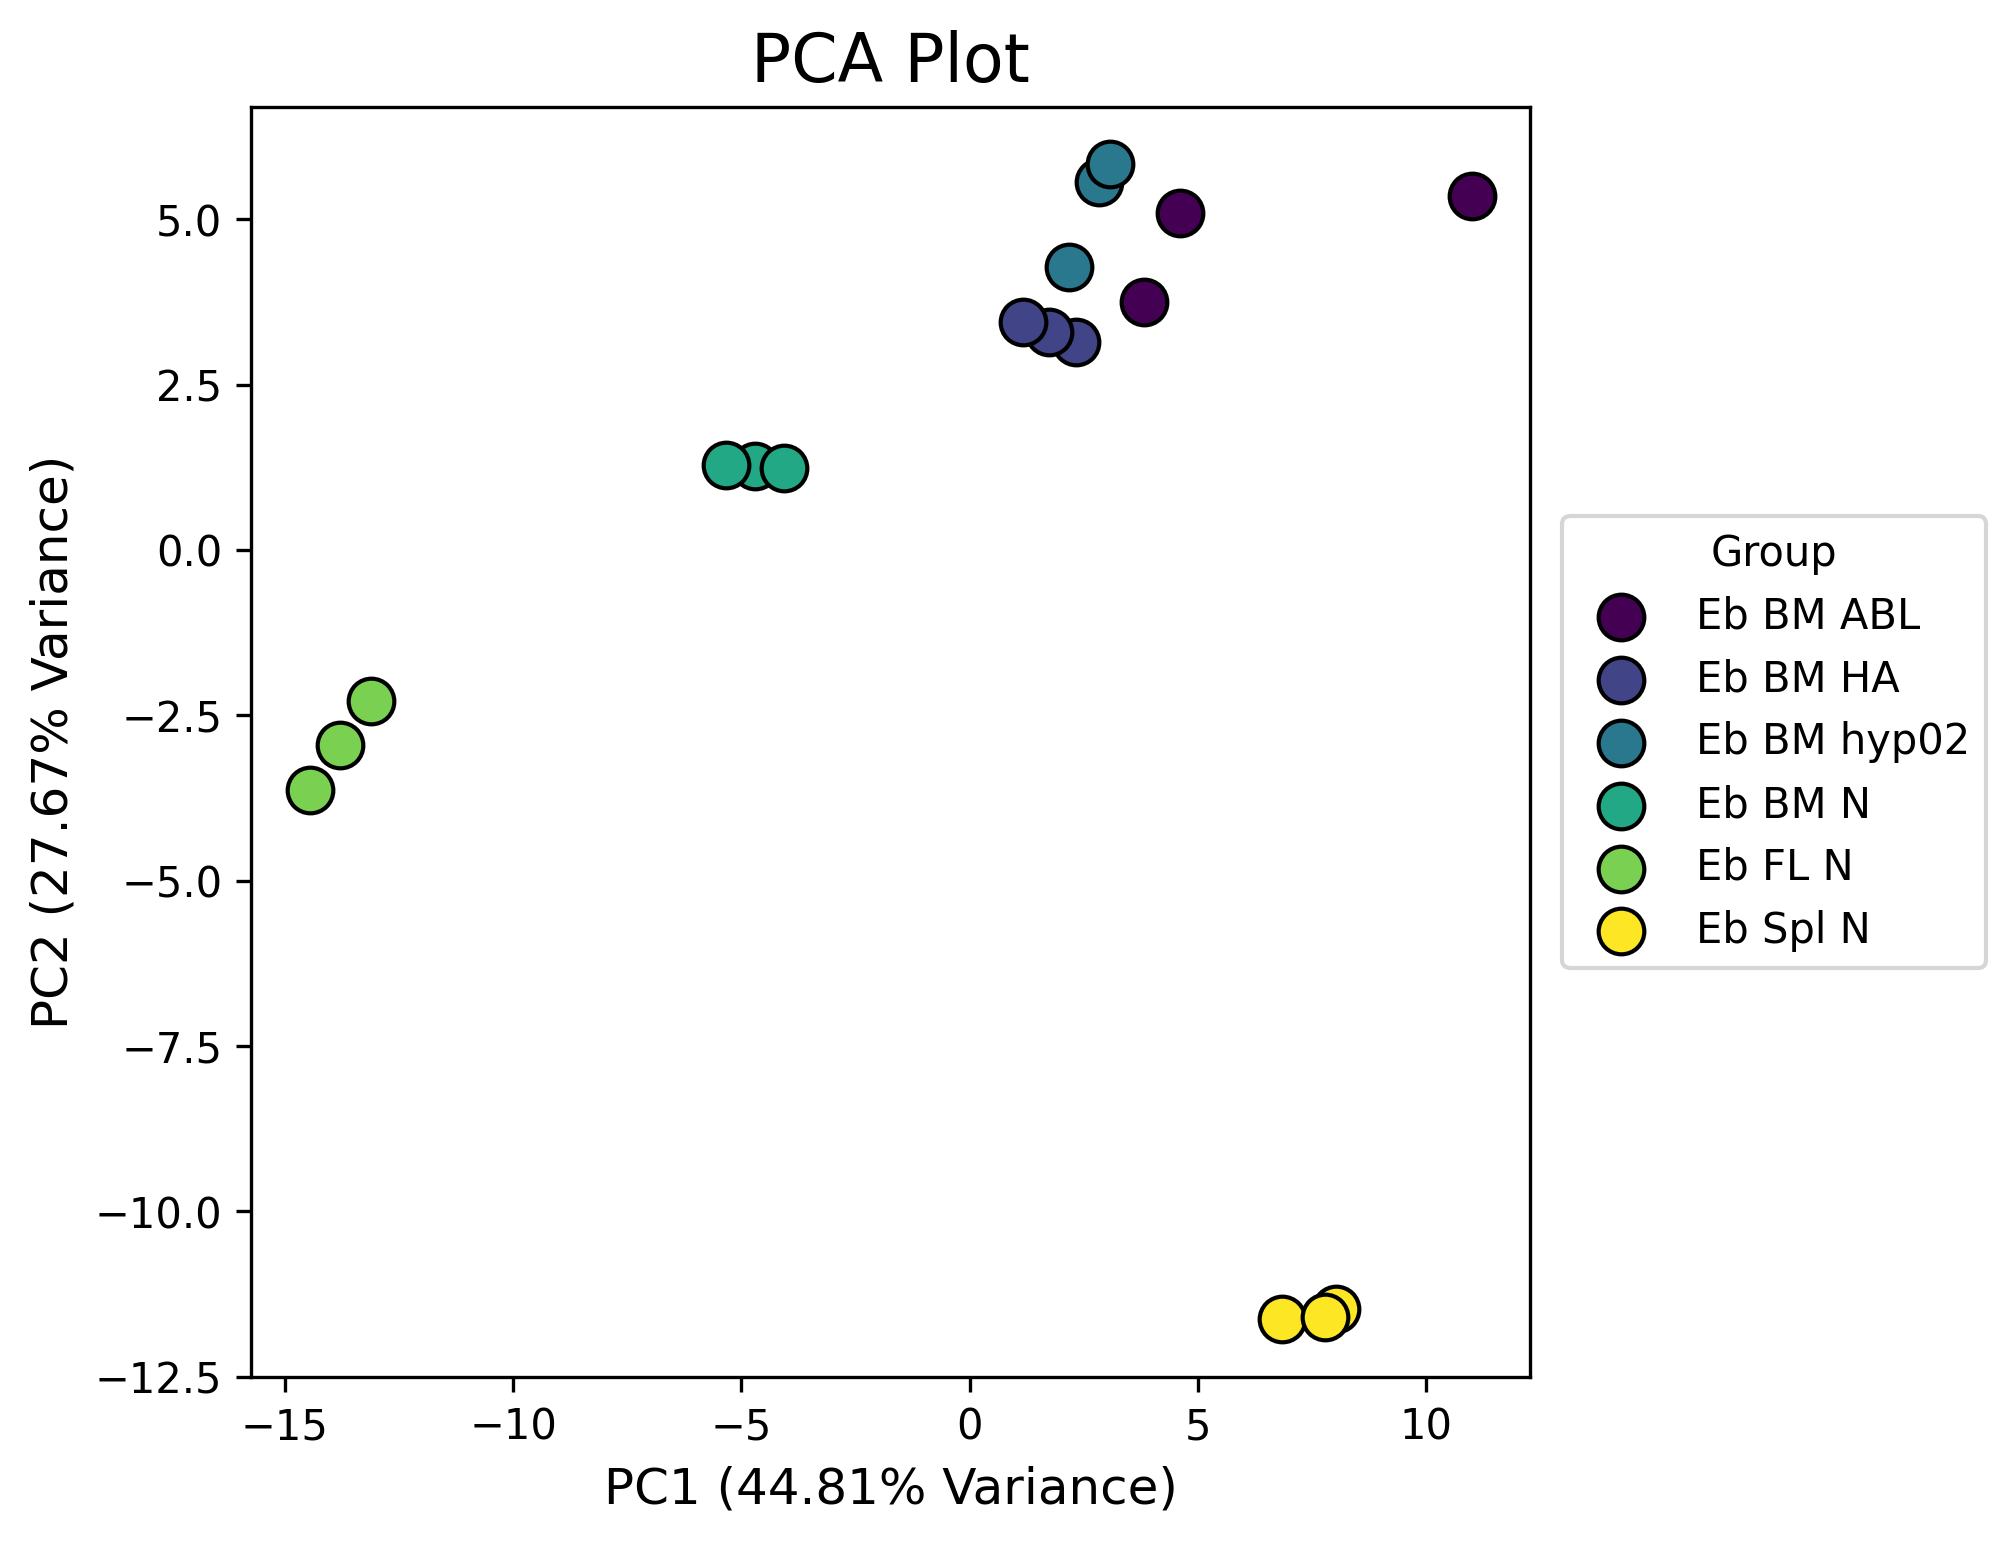

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustered_df)

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
pca_results

# Create a df for PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
pca_df['Sample'] = list(clustered_df.T.columns)

# Plot the first 2 PC
plt.figure(figsize=(5.5, 5.5), dpi=300)

pca_df['Group'] = pca_df['Sample'].map(column_to_group)
unique_groups = pca_df['Group'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups))) # Choose cmap here, i.e. cm.viridis ot cm.tab10 
                                                               # https://matplotlib.org/stable/users/explain/colors/colormaps.html

for group, color in zip(unique_groups, colors):
    subset = pca_df[pca_df['Group'] == group]
    plt.scatter(
        subset['PC1'], subset['PC2'], 
        label=f"{group}",
        color=color, edgecolor='k', s=120
    )

plt.title('PCA Plot', fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)", fontsize=12)
plt.legend(
    title="Group", fontsize=10, loc='center left', 
    bbox_to_anchor=(1.025, 0.5), borderaxespad=0.
) 
# plt.grid(True)
plt.savefig('PCA plot.png', dpi=600, bbox_inches='tight')
plt.show()

### Heatmap

In [15]:
df_scaled_centred = stats.zscore(df, axis=0) # Case 2

visuz.gene_exp.hmap(
                    # df=df, # Case 1
                    df=df_scaled_centred, # Case 2
                    cmap='bwr',
                    # Keep the following consistent with the clustering step!!!
                    colclus=True, rowclus=False, # Analyte clustering
                    # colclus=True, rowclus=True, # Analyte and sample clustering
                    dim=(18,4),  
                    tickfont=(6,6), r=600, figname='clustered_df', show=False)
plt.close()

### Select Differentially Produced Analytes

In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore")

df["Group"] = df.index.map(column_to_group)
significant_variables = []

significance_th = 0.01 # Pick significance threshold (0.05 / 0.01 / 0.005)

# Perform Two-Way ANOVA with Tukey correction for each Analyte
for variable in df.columns[:-1]:  # Exclude the "Group" column
    data_long = df.reset_index().melt(id_vars=["index", "Group"], value_vars=[variable])
    data_long.rename(columns={"index": "Sample", "value": "Value", "variable": "Variable"}, inplace=True)
    
    # Perform Two-Way ANOVA
    model = ols("Value ~ C(Group)", data=data_long).fit()
    anova_results = anova_lm(model)
    
    # Significance test
    if anova_results.loc["C(Group)", "PR(>F)"] < significance_th:
        # Perform Tukey
        tukey = pairwise_tukeyhsd(endog=data_long["Value"], groups=data_long["Group"], alpha=0.05)
        significant_comparisons = tukey.summary().data[1:]  # Skip the header
        
        # Check if any pairwise comparison is significant
        is_significant = any(row[4] < significance_th for row in significant_comparisons)
        
        if is_significant:
            significant_variables.append(variable)
            
warnings.filterwarnings("default")
df.drop(columns=["Group"], inplace=True)

# Create a new DataFrame with only significant Analytes
df_significant = df[significant_variables]
df_significant

Sample,App,Arhgdib,B2m,Blnk,Btla,C3,Camp,Casp8,Ccl3,Ccl9,...,Tgfb1,Tgfbi,Tgfbr2,Tnfaip3,Tnfrsf11a,Tnfrsf14,Tollip,Traf4,Trem1,Xbp1
Eb BM ABL 1,9.060,12.120,12.100,6.620,6.270,9.78,15.720,7.450,8.820,10.230,...,9.010,9.32,7.020,9.910,4.620,6.900,8.400,8.150,9.960,9.510
Eb BM ABL 2,10.280,12.390,12.250,8.030,7.440,10.14,15.490,8.840,10.440,9.490,...,9.900,8.77,8.440,11.180,6.440,8.250,9.200,9.140,10.510,10.900
Eb BM ABL 3,9.190,12.190,12.310,6.710,5.390,10.71,15.050,6.970,9.290,9.250,...,9.140,8.09,7.970,10.360,4.390,7.560,8.850,7.560,9.940,10.360
Eb BM HA 1,8.790,12.690,11.720,5.290,5.500,10.74,15.400,6.760,9.280,8.540,...,9.350,7.32,6.630,10.680,3.910,7.610,8.760,6.980,9.510,9.570
Eb BM HA 2,8.780,12.450,11.645,5.175,5.730,10.49,15.385,6.980,9.035,8.855,...,9.265,7.28,6.580,10.540,4.640,7.565,8.880,6.445,9.570,9.520
Eb BM HA 3,8.770,12.210,11.570,5.060,5.960,10.24,15.370,7.200,8.790,9.170,...,9.180,7.24,6.530,10.400,5.370,7.520,9.000,5.910,9.630,9.470
Eb BM hyp02 1,7.980,11.760,12.570,6.330,4.630,9.65,14.440,6.270,9.170,8.990,...,9.320,8.10,6.900,10.330,4.900,8.920,9.070,6.790,9.370,9.920
Eb BM hyp02 2,8.600,12.340,12.000,6.510,4.190,9.78,14.470,6.580,8.890,9.750,...,9.220,8.68,7.130,10.050,3.800,8.940,9.150,6.970,9.190,10.130
Eb BM hyp02 3,8.700,12.160,12.230,5.960,4.370,10.09,14.470,6.500,9.480,10.150,...,9.280,9.00,6.420,10.610,4.830,8.870,9.250,7.070,9.820,9.910
Eb BM N 1,7.090,10.835,11.700,6.815,4.845,8.33,13.005,6.330,8.695,8.325,...,8.580,7.37,5.985,9.250,2.955,9.470,8.370,5.850,8.245,8.585


In [30]:
# Cluster differentially-produced Analytes

cluster_map = sns.clustermap(df_significant)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind

clustered_df_significant = df_significant.iloc[:, clustered_cols] # Analyte clustering 
# clustered_df_significant = df_significant.iloc[clustered_rows, :].iloc[:, clustered_cols] # Analyte and sample clustering
clustered_df_significant

Sample,Camp,S100a8,S100a9,Lck,Tcf7,Btla,H2-Ob,Cd22,Cxcr5,Ifna1,...,Ctss,Mif,Cd74,H2-Aa,B2m,Cd24a,Lilrb4,Tfrc,Arhgdib,Cybb
Eb BM ABL 1,15.720,16.790,17.780,4.620,4.98,6.270,6.670,5.720,6.060,4.620,...,9.010,7.430,10.650,10.71,12.100,10.930,11.510,10.410,12.120,11.390
Eb BM ABL 2,15.490,17.290,18.140,4.440,4.44,7.440,7.770,7.030,7.250,4.440,...,7.610,8.030,11.210,11.09,12.250,10.980,13.300,11.430,12.390,11.910
Eb BM ABL 3,15.050,16.580,17.620,6.710,4.39,5.390,4.390,4.390,5.390,5.390,...,7.190,8.190,10.000,9.48,12.310,11.680,11.260,10.910,12.190,11.500
Eb BM HA 1,15.400,17.420,18.110,1.590,4.40,5.500,6.170,4.760,5.170,2.590,...,7.800,8.370,10.780,9.86,11.720,12.040,10.540,10.410,12.690,11.810
Eb BM HA 2,15.385,17.265,18.000,2.400,4.51,5.730,6.085,4.780,5.335,3.150,...,7.760,8.235,10.595,9.83,11.645,12.020,10.705,10.640,12.450,11.645
Eb BM HA 3,15.370,17.110,17.890,3.210,4.62,5.960,6.000,4.800,5.500,3.710,...,7.720,8.100,10.410,9.80,11.570,12.000,10.870,10.870,12.210,11.480
Eb BM hyp02 1,14.440,16.550,17.600,5.130,4.29,4.630,5.400,3.050,4.050,4.900,...,7.880,6.990,10.450,10.85,12.570,13.500,11.080,12.180,11.760,10.900
Eb BM hyp02 2,14.470,16.810,17.740,0.000,2.60,4.190,4.600,3.380,3.700,4.120,...,8.830,6.910,9.760,9.78,12.000,13.570,11.250,11.700,12.340,11.790
Eb BM hyp02 3,14.470,16.910,18.070,5.070,3.70,4.370,5.280,3.960,4.180,4.370,...,8.720,7.180,9.600,9.77,12.230,13.540,11.520,12.180,12.160,11.270
Eb BM N 1,13.005,15.640,16.625,5.345,2.05,4.845,4.745,4.135,3.645,0.625,...,8.155,7.355,10.000,9.96,11.700,13.625,9.710,12.215,10.835,9.990


In [31]:
df_scaled_centred_significant = stats.zscore(df_significant, axis=0) # Case 2

visuz.gene_exp.hmap(
                    # df=df_significant, # Case 1
                    df=df_scaled_centred_significant, # Case 2
                    cmap='bwr',
                    # Keep the following consistent with the clustering step!!!
                    colclus=True, rowclus=False, # Analyte clustering
                    # colclus=True, rowclus=True, # Analyte and sample clustering
                    dim=(18,4),  
                    tickfont=(6,6), r=600, figname='clustered_df_significant', show=False)
plt.close()

In [32]:
clustered_df_significant.T.to_csv('clustered_df_significant.csv') # Export Differentially Produced Analyte df

### Correlation analysis

In [33]:
# Perform analysis

corr_df = df_significant
corr_df.rename_axis("Analyte", inplace=True)
corr_df.rename_axis("Analyte", axis=1,inplace=True)

correlation_matrix = corr_df.corr(method='pearson') # pearson / spearman 

# Cluster
cluster_map = sns.clustermap(correlation_matrix)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind
correlation_matrix = correlation_matrix.iloc[clustered_rows, :].iloc[:, clustered_cols]


correlation_matrix

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Analyte,Lck,Tcf7,H2-Ob,Cd274,Btla,Cd22,Cxcr5,H2-Eb1,Cd83,Ltb,...,Tfrc,Cd24a,Psmc2,Ctss,Mif,Cd36,Mx1,Tnfrsf11a,Ctnnb1,Ifna1
Analyte,,,,,,,,,,,,,,,,,,,,,
Lck,1.000000,0.631431,0.572730,0.495875,0.667674,0.639482,0.625899,0.595907,0.442868,0.497173,...,-0.513864,-0.423370,-0.373041,0.414387,0.282808,0.028517,0.119959,-0.119749,0.073481,-0.054665
Tcf7,0.631431,1.000000,0.834699,0.904233,0.892587,0.804650,0.905658,0.610035,0.551895,0.613004,...,-0.854966,-0.814136,-0.772454,0.642836,0.651966,-0.176779,0.392985,0.221632,0.167144,0.318847
H2-Ob,0.572730,0.834699,1.000000,0.904720,0.936224,0.940501,0.946207,0.855122,0.827984,0.791618,...,-0.873165,-0.752227,-0.666407,0.384660,0.358587,-0.422175,0.038959,-0.107481,-0.134114,-0.130313
Cd274,0.495875,0.904233,0.904720,1.000000,0.911777,0.884691,0.954520,0.644205,0.673232,0.677669,...,-0.836485,-0.829459,-0.760720,0.508004,0.551473,-0.292737,0.335547,0.215935,0.133629,0.196478
Btla,0.667674,0.892587,0.936224,0.911777,1.000000,0.972502,0.975986,0.726972,0.663448,0.653160,...,-0.873118,-0.834445,-0.737671,0.521080,0.598336,-0.326939,0.226074,0.087600,0.012834,0.036087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cd36,0.028517,-0.176779,-0.422175,-0.292737,-0.326939,-0.381848,-0.406580,-0.506060,-0.435843,-0.462774,...,0.524914,0.496339,0.573760,0.511605,0.024770,1.000000,0.524570,0.444924,0.610750,0.412333
Mx1,0.119959,0.392985,0.038959,0.335547,0.226074,0.104016,0.193658,-0.401321,-0.370368,-0.351094,...,0.054623,-0.330925,-0.110225,0.634892,0.637183,0.524570,1.000000,0.912325,0.892777,0.912398
Tnfrsf11a,-0.119749,0.221632,-0.107481,0.215935,0.087600,-0.023115,0.048414,-0.562583,-0.524904,-0.516672,...,0.165266,-0.229460,-0.046535,0.476069,0.668942,0.444924,0.912325,1.000000,0.792093,0.855133


In [34]:
plt.figure(figsize=(28,28)) #Size

sns.heatmap(
    correlation_matrix,   # df
    cmap="bwr",           # Color map
    cbar=False,           # Show the scale
    annot_kws={"size": 8} # Font size
)

# Save the heatmap
output_path = "correlation_matrix_heatmap.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.close()

# Pairwise Analyte Analysis

In [112]:
# Select Groups

Group_1 = "Eb Spl N"
Group_2 = "Eb FL N"

valid_samples = [sample for sample, group in column_to_group.items() if group in [Group_1, Group_2]]
pairwise_df = df.loc[valid_samples]

pairwise_df

Sample,App,Arhgdib,B2m,Blnk,Btla,C3,Camp,Casp8,Ccl3,Ccl9,...,Tgfbi,Tgfbr2,Tnfaip3,Tnfrsf11a,Tnfrsf14,Tollip,Traf4,Trem1,Tyrobp,Xbp1
Eb FL N 1,7.950,8.670,11.510,3.74,6.340,5.71,3.600,6.960,7.36,7.14,...,5.72,6.53,6.530,8.50,7.930,7.840,6.34,5.880,10.88,8.31
Eb FL N 2,7.715,8.195,10.865,3.32,6.705,5.99,1.955,7.015,7.30,6.76,...,6.21,6.30,6.555,8.75,7.995,7.875,6.79,6.255,10.19,8.26
Eb FL N 3,7.480,7.720,10.220,2.90,7.070,6.27,0.310,7.070,7.24,6.38,...,6.70,6.07,6.580,9.00,8.060,7.910,7.24,6.630,9.50,8.21
Eb Spl N 1,6.120,11.120,13.450,8.52,8.620,5.94,6.550,7.460,8.30,7.76,...,7.07,9.03,11.480,2.03,5.620,8.300,6.28,5.730,9.90,9.72
Eb Spl N 2,6.500,11.050,13.210,9.31,9.120,5.90,7.800,7.640,9.91,8.34,...,7.60,8.78,11.570,3.84,6.220,8.560,5.61,6.510,10.44,9.59
Eb Spl N 3,6.360,10.900,13.380,9.14,9.030,5.62,7.890,7.700,9.99,8.37,...,7.54,8.67,11.470,3.36,5.930,8.360,5.12,6.630,10.53,9.61


### Perform Multiple T-tests

In [223]:
# NB it is assumed that the data is in log format!!!

from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Separate samples by groups
group1_samples = [sample for sample, group in column_to_group.items() if group == Group_1]
group2_samples = [sample for sample, group in column_to_group.items() if group == Group_2]

# Filter data for the groups
group1_data = df.loc[group1_samples]
group2_data = df.loc[group2_samples]

# Initialize empty results variable
results = []

# Multiple T-tests
for variable in df.columns:
    # Extract data for the variable
    group1_values = group1_data[variable]
    group2_values = group2_data[variable]
    
    # Perform multiple T-tests
    t_stat, p_value = ttest_ind(group1_values, group2_values, equal_var=False)
    
    # Calculate the log(fold change)
    fold_change = group1_values.mean() - group2_values.mean()
    
    # Append results
    results.append({"Variable": variable, "FoldChange": fold_change, "PValue": p_value})

# Convert to df
results_df = pd.DataFrame(results)

# Apply FDR correction
_, q_values, _, _ = multipletests(results_df["PValue"], method="fdr_bh")

# Add q-values to the DataFrame
results_df["q-value"] = q_values
results_df["-log10(q-value)"] = -np.log10(results_df["q-value"])
results_df["Mean"] = list(pairwise_df.mean())
results_df.rename(columns={'PValue': 'p-value', 'FoldChange': 'log2(FC)'}, inplace=True) # Rename sample column name if needed
results_df.set_index(['Variable'], inplace=True)
results_df = results_df.sort_values(by="log2(FC)", ascending=False)

results_df

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,log2(FC),p-value,q-value,-log10(q-value),Mean
Variable,,,,,
H2-Ea-ps,10.018333,0.000015,0.000318,3.497941,7.464167
Cd74,8.860000,0.000025,0.000343,3.464662,9.640000
Cd69,8.053333,0.001135,0.004691,2.328757,6.406667
H2-Ab1,7.761667,0.001969,0.005814,2.235495,8.425833
H2-Aa,7.743333,0.000070,0.000723,3.141134,10.151667
...,...,...,...,...,...
Cd36,-3.205000,0.016310,0.023517,1.628616,9.282500
Mx1,-4.746667,0.001486,0.005314,2.274617,7.686667
Tal1,-5.011667,0.000105,0.000933,3.030121,5.699167


### Optionally filter the weakly expressed variables

In [227]:
mean_lower_th = 6

results_df = results_df[results_df["Mean"] > mean_lower_th]
results_df

,log2(FC),p-value,q-value,-log10(q-value),Mean,Color
Variable,,,,,,
H2-Ea-ps,10.018333,0.000015,0.000318,3.497941,7.464167,#7F00FF
Cd74,8.860000,0.000025,0.000343,3.464662,9.640000,#7F00FF
Cd69,8.053333,0.001135,0.004691,2.328757,6.406667,#7F00FF
H2-Ab1,7.761667,0.001969,0.005814,2.235495,8.425833,#7F00FF
H2-Aa,7.743333,0.000070,0.000723,3.141134,10.151667,#7F00FF
...,...,...,...,...,...,...
Fcgr3,-2.006667,0.027599,0.036024,1.443413,7.166667,#097969
Tnfrsf14,-2.071667,0.005180,0.010531,1.977550,6.959167,#097969
Tfrc,-2.463333,0.002050,0.005912,2.228293,9.858333,#097969


In [228]:
results_df.to_csv('Pairwise_comp_results.csv') # Export Differentially Produced Analyte data

In [229]:
# Define thresholds
fc_threshold = 2  # Log2(FC) threshold
qval_threshold = 0.05  # -log10(q-value) threshold
top_variables = 5

top_upregulated = results_df.nlargest(top_variables, "log2(FC)")
top_downregulated = results_df.nsmallest(top_variables, "log2(FC)")

# Pick colors:
# https://htmlcolorcodes.com/color-picker/

Up_regulated_color = '#7F00FF'
Down_regulated_color = '#097969'

Non_significant_color = 'Black'

# Color-code the variables
results_df["Color"] = Non_significant_color
results_df.loc[(results_df["log2(FC)"] < -fc_threshold) & (results_df["q-value"] < qval_threshold), "Color"] = Down_regulated_color
results_df.loc[(results_df["log2(FC)"] > fc_threshold) & (results_df["q-value"] < qval_threshold), "Color"] = Up_regulated_color

results_df

/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_87119/2010126424.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Color"] = Non_significant_color


,log2(FC),p-value,q-value,-log10(q-value),Mean,Color
Variable,,,,,,
H2-Ea-ps,10.018333,0.000015,0.000318,3.497941,7.464167,#7F00FF
Cd74,8.860000,0.000025,0.000343,3.464662,9.640000,#7F00FF
Cd69,8.053333,0.001135,0.004691,2.328757,6.406667,#7F00FF
H2-Ab1,7.761667,0.001969,0.005814,2.235495,8.425833,#7F00FF
H2-Aa,7.743333,0.000070,0.000723,3.141134,10.151667,#7F00FF
...,...,...,...,...,...,...
Fcgr3,-2.006667,0.027599,0.036024,1.443413,7.166667,#097969
Tnfrsf14,-2.071667,0.005180,0.010531,1.977550,6.959167,#097969
Tfrc,-2.463333,0.002050,0.005912,2.228293,9.858333,#097969


## Volcano Plot 

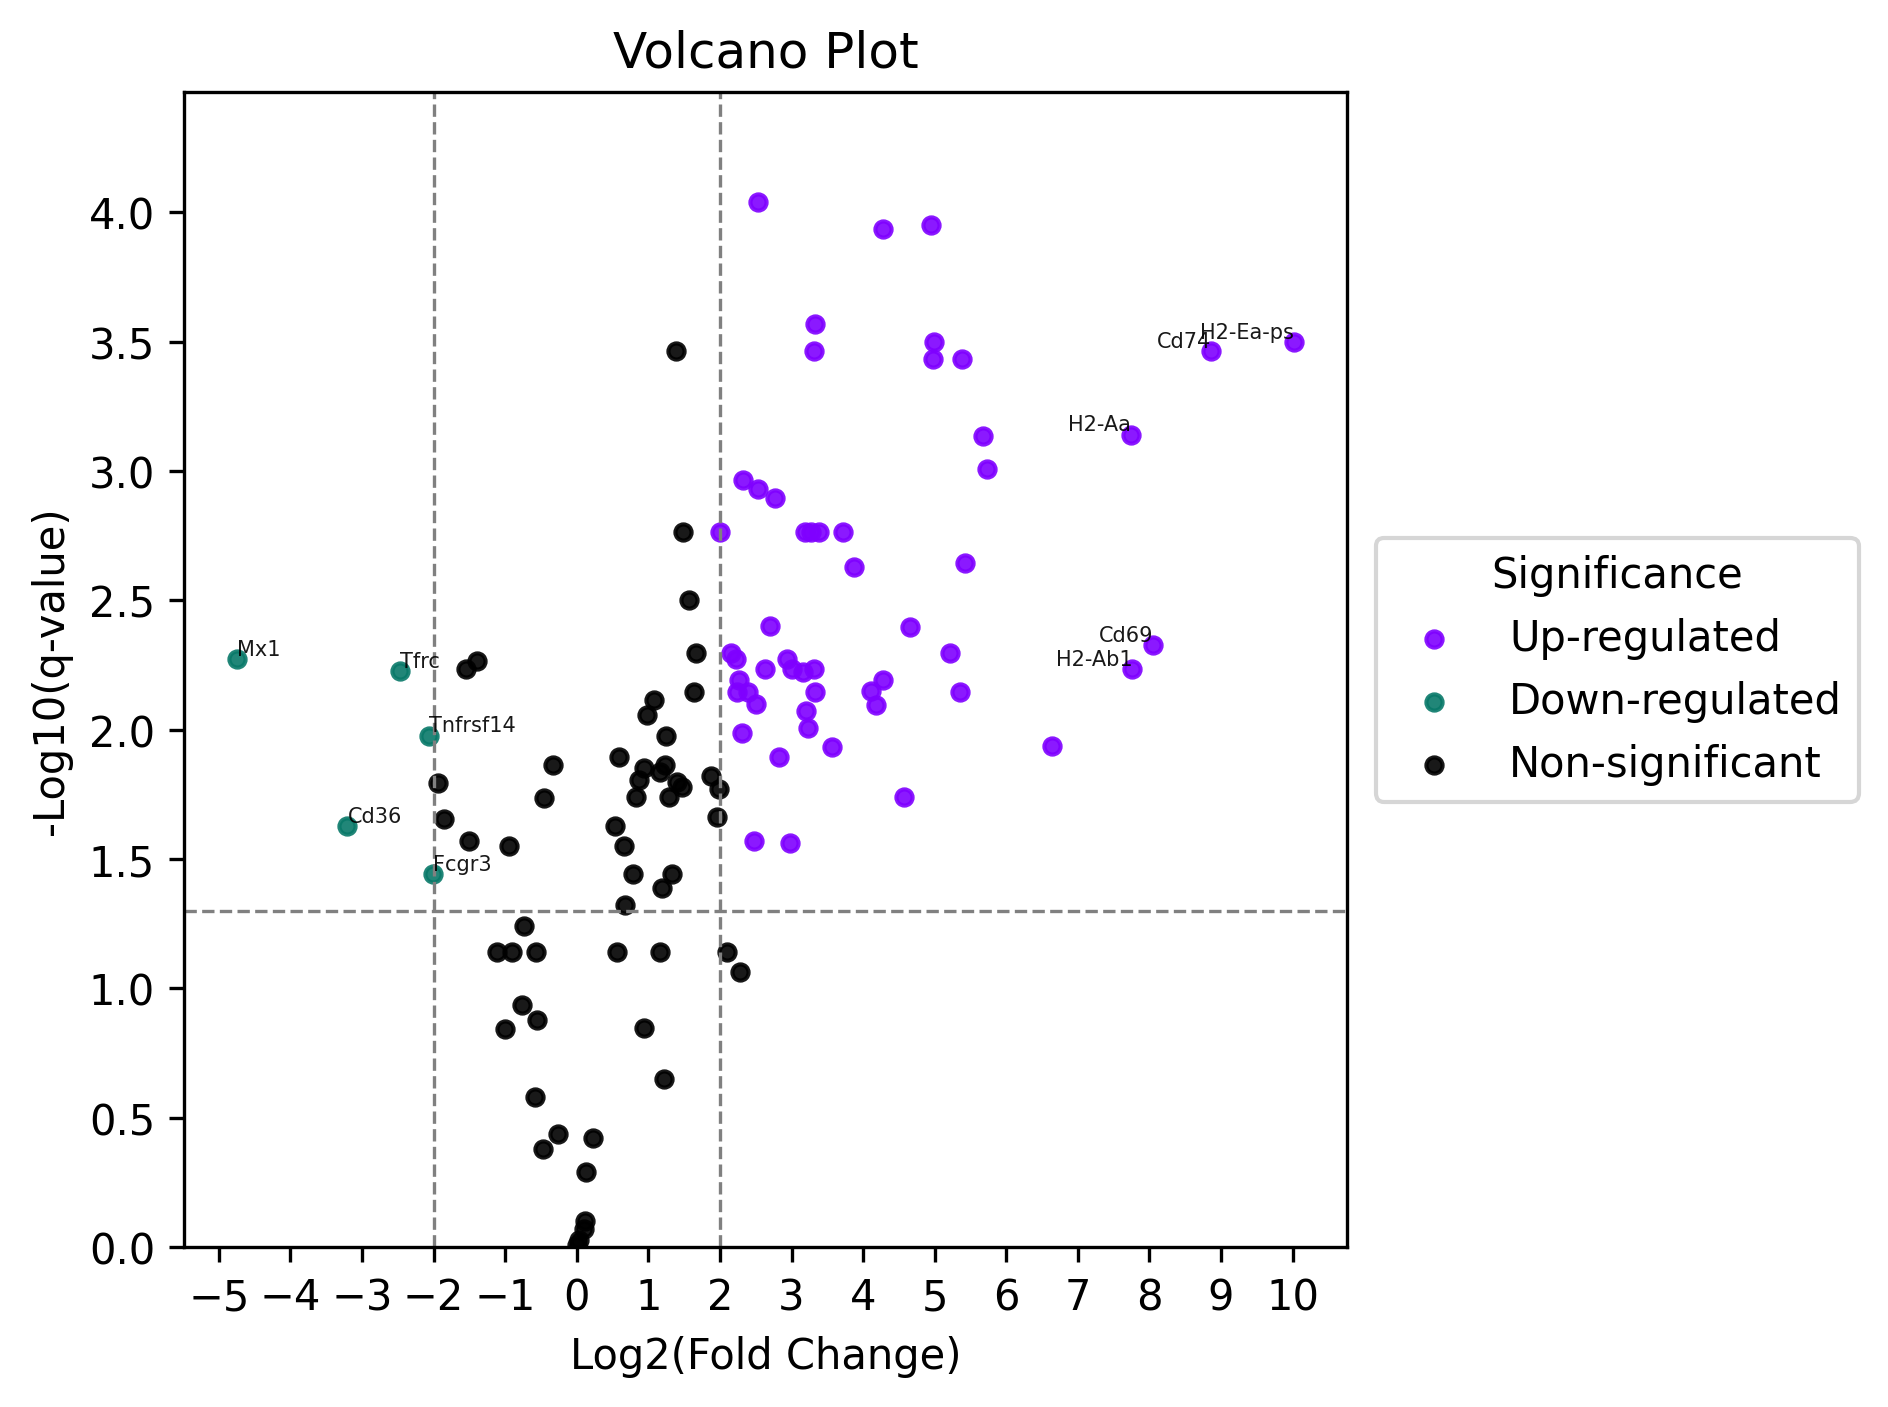

In [240]:
q_val_th = subset["-log10(q-value)"].max() + 1

plt.figure(figsize=(5, 5), dpi=300)
colors = {Up_regulated_color: "Up-regulated", Down_regulated_color: "Down-regulated",  Non_significant_color: "Non-significant"}

for color, label in colors.items():
    subset = results_df[results_df["Color"] == color]
    plt.scatter(subset["log2(FC)"], subset["-log10(q-value)"], 
                color=color,
                marker='o',
                label=label,
                s=15,
                alpha=0.9)

 # Add labels for the top genes
for _, row in top_upregulated.iterrows():
    plt.text(row["log2(FC)"], row["-log10(q-value)"], row.name, alpha=0.9, fontsize=5, color='black', 
                                                                ha="right", va='bottom')

for _, row in top_downregulated.iterrows():
    plt.text(row["log2(FC)"], row["-log10(q-value)"], row.name, alpha=0.9, fontsize=5, color='black',
                                                                ha="left", va='bottom')


# Add legend
plt.legend(title="Significance", fontsize=10, loc='center left', 
    bbox_to_anchor=(1.025, 0.5), borderaxespad=0.)

plt.xticks(np.arange(round(results_df["log2(FC)"].min()), results_df["log2(FC)"].max(), 1)) # Change tick size

# Add labels and title
plt.axhline(y=-np.log10(qval_threshold), color="grey", linestyle="--", linewidth=0.8)
plt.axvline(x=-fc_threshold, color="grey", linestyle="--", linewidth=0.8)
plt.axvline(x=fc_threshold, color="grey", linestyle="--", linewidth=0.8)

plt.ylim(0,q_val_th)

plt.xlabel("Log2(Fold Change)")
plt.ylabel("-Log10(q-value)")
plt.title("Volcano Plot")

# Save the plot
plt.savefig('Volcano Plot.png', dpi=600, bbox_inches='tight')
plt.show()

## Mean Average (MA) Plot 

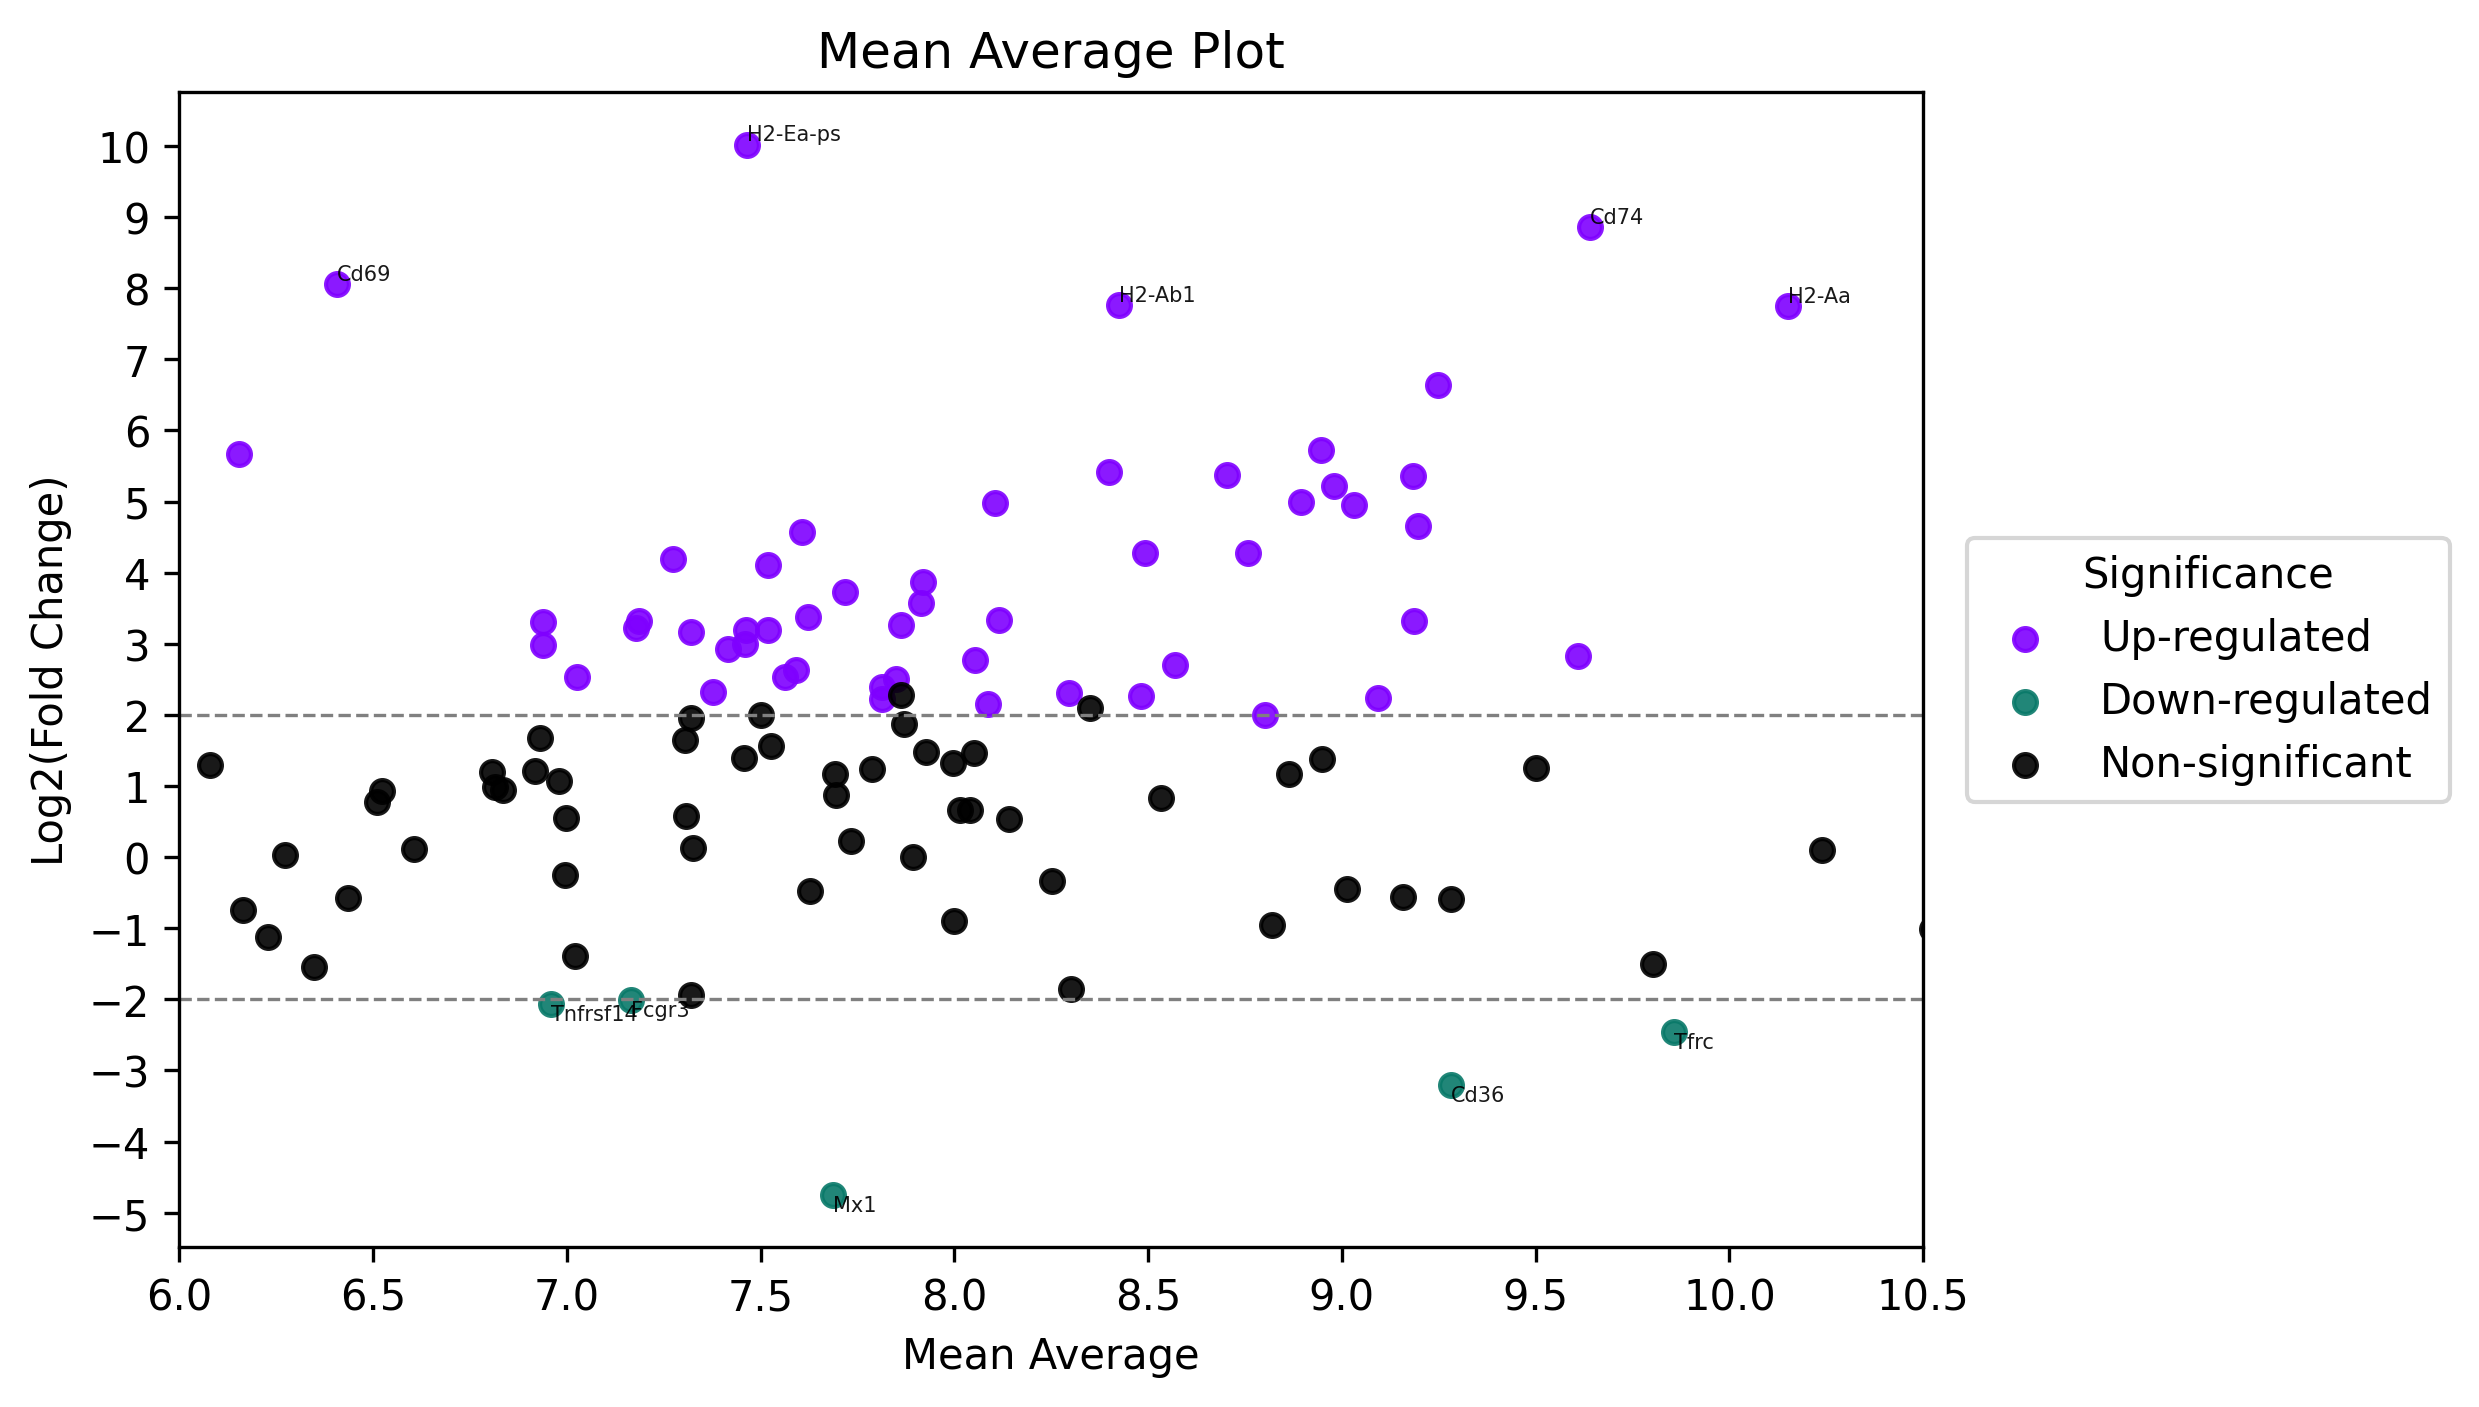

In [236]:
Min_Mean_val = 6
Max_Mean_val = 10.5

plt.figure(figsize=(7.5, 5), dpi=300)

colors = {Up_regulated_color: "Up-regulated", Down_regulated_color: "Down-regulated", Non_significant_color: "Non-significant"}

for color, label in colors.items():
    subset = results_df[results_df["Color"] == color]
    plt.scatter(subset["Mean"], subset["log2(FC)"], 
                color=color,
                marker='o',
                label=label,
                s=30,
                alpha=0.9)

# Add legend
plt.legend(title="Significance", fontsize=10, loc='center left', 
    bbox_to_anchor=(1.025, 0.5), borderaxespad=0.)

 # Add labels for the top genes
for _, row in top_upregulated.iterrows():
    plt.text(row["Mean"], row["log2(FC)"], row.name, fontsize=5, alpha=0.9, color='black', 
                                                     ha="left", va='bottom')

for _, row in top_downregulated.iterrows():
    plt.text(row["Mean"], row["log2(FC)"], row.name, fontsize=5, alpha=0.9, color='black', 
                                                     ha="left", va='top')

plt.xticks(np.arange(round(results_df["Mean"].min()), results_df["Mean"].max(), 0.5)) # Change tick size
plt.yticks(np.arange(round(results_df["log2(FC)"].min()), results_df["log2(FC)"].max(), 1)) # Change tick size

# Add labels and title
plt.axhline(y=-fc_threshold, color="grey", linestyle="--", linewidth=0.8)
plt.axhline(y=fc_threshold, color="grey", linestyle="--", linewidth=0.8)

plt.xlabel("Mean Average")
plt.ylabel("Log2(Fold Change)")
plt.title("Mean Average Plot")

plt.xlim(Min_Mean_val,Max_Mean_val)

# Save the plot
plt.savefig('Mean Average Plot.png', dpi=600, bbox_inches='tight')
plt.show()